## Lab 3: Decision Trees SOLUTION

In [1]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import tree
from sklearn.metrics import accuracy_score 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
digits = datasets.load_digits()

X = digits['data']   # this is the data with each 8x8 image "flattened" into a length-64 vector.
Y = digits['target'] # these are the labels (0-9). 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [4]:
tree_1 = tree.DecisionTreeClassifier(max_depth=3, random_state=2021)

tree_1 = tree_1.fit(X_train, Y_train)

Y_pred = tree_1.predict(X_test)

Y_pred_train = tree_1.predict(X_train)

# errors
error_train=list(Y_train == Y_pred_train).count(False)/len(Y_train)
error_test=list(Y_test == Y_pred).count(False)/len(Y_test)

print("The training error was: ", error_train)
print("The testing error was: ", error_test)

The training error was:  0.5260960334029228
The testing error was:  0.5361111111111111


In [5]:
# what is the accuracy of the prediction?
print ("Training Accuracy is ", accuracy_score(Y_train,Y_pred_train))
print ("Testing Accuracy is ", accuracy_score(Y_test,Y_pred))

# what is the sum of error and accuracy?
print("Note that adding the accuracy and error is: ", error_train + accuracy_score(Y_train,Y_pred_train))

Training Accuracy is  0.48295059151009045
Testing Accuracy is  0.42777777777777776
Note that adding the accuracy and error is:  1.0


3. Explore your model in the image below.  How many of the following are there?
* Root Nodes: *1*
* Interior Nodes: *6*
* Leaf or Terminal Nodes: *8*

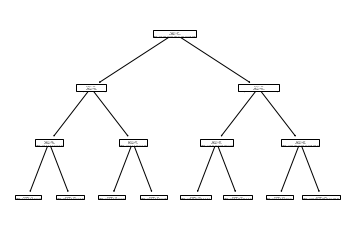

In [5]:
tree.plot_tree(tree_1);

#### Decision Tree hyperparameters


* `criterion`: this tells us which method to decide which split is better, entropy or gini.
* `splitter`: which strategy to use in splitting (ie, best or random)
* `max_depth`: How deep our tree is
* `min_samples_split`: the minimum number of samples we have left, in order to make a new split.
* `min_samples_leaf`: The minimum number of samples needed to form a leaf.
* `min_weight_fraction_leaf`: same as above, but given as a proportion of hte whole instead of an absolute number.
* `max_features`: the number of features we consider when deciding on a split.


In [10]:
# what is the optimal number of depth?
N=16  #testing up to k = 15

# initialize error vectors
error_test = [0 for j in range(0,N)] 
error_train = [0 for j in range(0,N)] 

for k in range(1,N):
    # train
    clf = tree.DecisionTreeClassifier(max_depth=k, random_state=2022)
    clf = clf.fit(X_train, Y_train)
    
    # test
    Y_pred = clf.predict(X_test)
    Y_pred_train = clf.predict(X_train)
    
    # errors
    error_train[k]=list(Y_train == Y_pred_train).count(False)/len(Y_train)
    error_test[k]=list(Y_test == Y_pred).count(False)/len(Y_test)

error_test.pop(0)
error_train.pop(0)

error_test, error_train

([0.8138888888888889,
  0.6916666666666667,
  0.5361111111111111,
  0.4388888888888889,
  0.35,
  0.26666666666666666,
  0.18333333333333332,
  0.14722222222222223,
  0.14444444444444443,
  0.1527777777777778,
  0.14722222222222223,
  0.14722222222222223,
  0.1527777777777778,
  0.1527777777777778,
  0.1527777777777778],
 [0.7988865692414753,
  0.6784968684759917,
  0.5260960334029228,
  0.4279749478079332,
  0.3277661795407098,
  0.1941544885177453,
  0.1022964509394572,
  0.07028531663187196,
  0.03897007654836465,
  0.016005567153792623,
  0.006263048016701462,
  0.0020876826722338203,
  0.0,
  0.0,
  0.0])

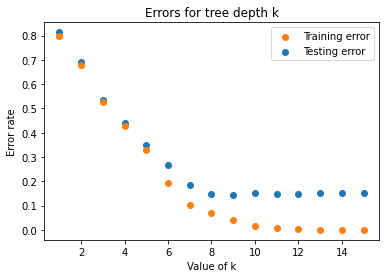

In [11]:
# plot training, testing error
K_array =list(range(1,N))

test_plt=plt.scatter(K_array, error_test)
train_plt = plt.scatter(K_array, error_train)
plt.legend([train_plt, test_plt], ['Training error', 'Testing error'])
plt.xlabel("Value of k")
plt.ylabel("Error rate")
plt.title("Errors for tree depth k")
plt.show()

In [12]:
# which k is the optimal?
# add 1, as we popped off the 0 at the begining
k_best = np.argmin(error_test)+1

print("My lowest test error was at a max_depth of = ",k_best)
print("With a testing error of ",min(error_test))
print("And a training error of ",error_train[k_best-1])

My lowest test error was at a max_depth of =  9
With a testing error of  0.14444444444444443
And a training error of  0.03897007654836465


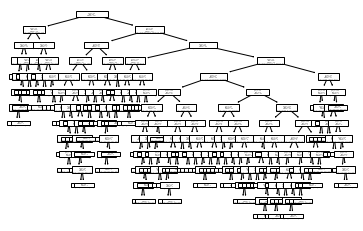

In [13]:
## best model graph:
best_tree = tree.DecisionTreeClassifier(max_depth = k, random_state=2022)
best_tree = best_tree.fit(X_train, Y_train)

tree.plot_tree(best_tree)